# Imports

In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile
import io
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
import pathlib

%run ../utils/object_detection_utils.ipynb
%run ../utils/data_utils.ipynb
%run ../global_variables.ipynb

MODEL_ROOT = os.path.join(OD_ROOT, "ws_bd/")

In [4]:
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
utils_ops.tf = tf.compat.v1
tf.gfile = tf.io.gfile

# Loading model

In [5]:
# Model
model = tf.saved_model.load(os.path.join(MODEL_ROOT,"models/model/export/saved_model/"))
model = model.signatures['serving_default']
# Category index
PATH_TO_LABELS = os.path.join(MODEL_ROOT,"dataset/binary_label_map.pbtxt")
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# Test with image

In [ ]:
paths = DATASETS["samples"]
images = return_all_images_in_folder_rec(paths)
print(images)

In [ ]:
for i,image in enumerate(images):
    sample = load_image(image, expand=True)
    result = run_inference_for_single_image(model, sample)
    img_inf = draw_inference(result, sample, 30, min_thresold=0.9)
    cv2.imwrite(os.path.join(OUTPUT_TMP, str(i)+".png"), img_inf)

In [ ]:
img_inf = draw_inference(result, sample, 30, min_thresold=0.9)
display(Image.fromarray(img_inf))

# Test with annotation

In [7]:
art_dataset_root = os.path.join(DATASETS_ROOT, "artificial/dataset01/")
annotation_path = os.path.join(art_dataset_root, "annotations/00054.xml")
annotation = parse_annotation(annotation_path)
print(annotation)

{'folder': 'images', 'filename': '00054.png', 'size': {'width': 1000, 'height': 1000, 'depth': 1}, 'objects': [{'name': 'diatom', 'xmin': 376, 'ymin': 327, 'xmax': 540, 'ymax': 449}, {'name': 'diatom', 'xmin': 237, 'ymin': 27, 'xmax': 343, 'ymax': 97}, {'name': 'diatom', 'xmin': 618, 'ymin': 0, 'xmax': 862, 'ymax': 94}, {'name': 'diatom', 'xmin': 266, 'ymin': 136, 'xmax': 380, 'ymax': 246}, {'name': 'diatom', 'xmin': 772, 'ymin': 101, 'xmax': 999, 'ymax': 405}, {'name': 'diatom', 'xmin': 269, 'ymin': 478, 'xmax': 489, 'ymax': 650}, {'name': 'diatom', 'xmin': 421, 'ymin': 93, 'xmax': 723, 'ymax': 217}, {'name': 'diatom', 'xmin': 602, 'ymin': 313, 'xmax': 690, 'ymax': 433}, {'name': 'diatom', 'xmin': 420, 'ymin': 442, 'xmax': 582, 'ymax': 602}, {'name': 'diatom', 'xmin': 824, 'ymin': 677, 'xmax': 954, 'ymax': 889}, {'name': 'diatom', 'xmin': 11, 'ymin': 450, 'xmax': 89, 'ymax': 560}, {'name': 'diatom', 'xmin': 73, 'ymin': 664, 'xmax': 181, 'ymax': 780}]}


In [23]:
image_path = os.path.join(art_dataset_root, annotation["folder"], annotation["filename"])
image = load_image(image_path, expand=True)
height, width, channels = image.shape
result = run_inference_for_single_image(model, image)
#display(Image.fromarray(image))

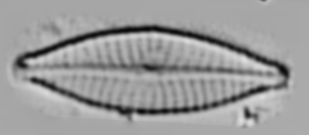

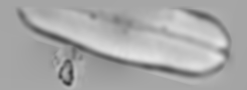

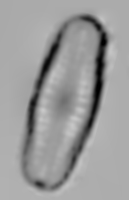

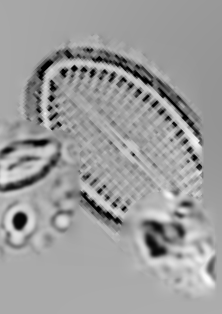

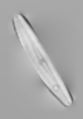

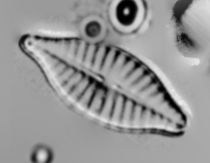

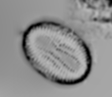

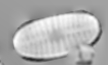

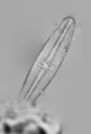

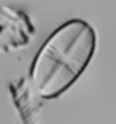

In [25]:
for i in range(result["num_detections"]):
    box = result["detection_boxes"][i]
    detec_scores = result["detection_scores"][i]
    if detec_scores>0.8:
        ymin, xmin, ymax, xmax = int(box[0]*height), int(box[1]*width), int(box[2]*height), int(box[3]*width)
        thumbail = image[ymin:ymax, xmin:xmax, 0]
        display(Image.fromarray(thumbail))